<h1> TUTORIAL ONE: </h1>
<h1>LOAD IN DATA AND RUN THE MOST BASIC POWER LAW FIT POSSIBLE </h1>
<h3> Author: Lindsey Gordon. Last Update: 1-4-23 </h3>

The most basic-est of basic tutorials. 

Getting etsfit installed: 
- clone repo (hopefully you already did this)
- get into terminal, cd into the outermost etsfit folder, then run **pip install .**
- double check install using **pip list** or **etsfit -v**

Example data + a TNS metafile is provided in the subfolder **tutorial_data**

In [1]:
#load in modules
import numpy as np
from etsfit import etsfit
import etsfit.utils.utilities as ut
import pandas as pd
from astropy.time import Time

ModuleNotFoundError: No module named 'numpy'

The process of running a fit is essentially: 

- get your data out
- make an etsfit instance
- put your data into etsfit
- run the fit

<b>
If you want to run more complicated fits/custom fits/GP fits, try tutorial 2.

If you want to run lots of fits in a row, try tutorial 3. (This will show you where to find functions that do everything in this file, just for lots of light curves in a row)

This tutorial uses data retrieved using **tessreduce** (Ridden-Harper 2021). If you want to run on data that isn't from TESS or is from a different TESS light curve extractor, try tutorial 4.
</b>


In [2]:
#TNS info:
TNSFile = "./tutorial_data/2018hzh_TNS.csv"
TNSinfo = pd.read_csv(TNSFile)
#data file:
dataFile = "./tutorial_data/2018hzh0431-tessreduce"

#saving into our local folder
save_dir = "."

#load data:
(time, flux, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
discoverytime = ut.get_disctime(TNSFile, targetlabel)

2018hzh 04 3 1


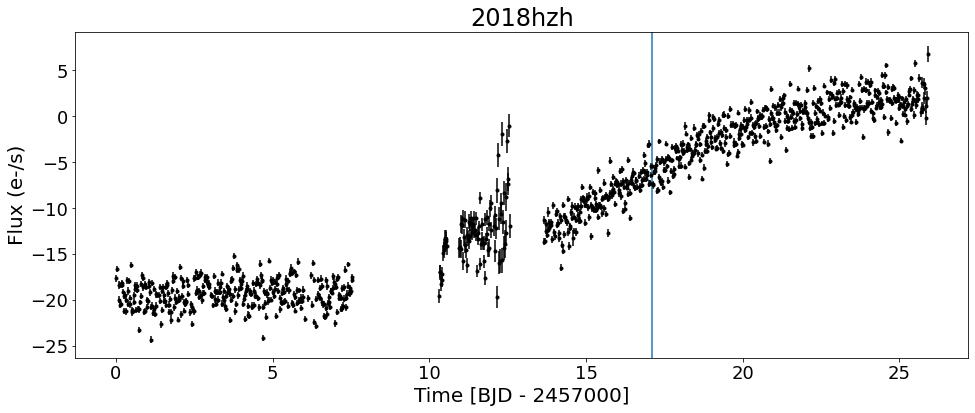

In [3]:
# NOTE if you need to re-run this cell you will also need to re-run the cell above this one
#make an etsfit instance
ets = etsMAIN(save_dir, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, flux, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
   
#(optional) run a window RMS filter over the data 
filt = ets.window_rms_filt(plot=False)
                
# run the cleaning function - this is where you will set things like:
    #filters (an array of 0's and 1's the same size as the input time/flux/error arrays)
    #binning (only to 8 hours is set up at the moment)
    #or fractional fits (0-1.0, will take that percent)
# we're going to run the most basic single power law, fit type 1
                
ets.pre_run_clean(1, flux_mask=filt, 
                    binning = False, fraction = None)

# test plot to be sure it ran
ets.test_plot()

In [4]:
# now to actually run it: 
ets.run_MCMC(n1=10000, n2=50000)
#n1 and n2 refer to the number of steps in the first and second chains
#this will save all of the output plots automatically, and they will not show up in a jupyter notebook
#this is because if you run these in a regular .py file for a hundred targets you will go insane from the popups

saving into folder:  ./2018hzh0431/singlepower/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


  9%|███▍                                 | 4700/50000 [00:45<07:22, 102.26it/s]

Converged, ending chain


24200 samples post second run
$t_0$ 10.22703438234844 -0.03578984000935215 0.033119934965414544
A 3.691115398524471 -0.04047472959237286 0.039252931924694145
$\beta$ 0.6704452093481246 -0.003626147260806234 0.00376612198423687
b -20.346275826036738 -0.018483848476126497 0.018785396137481314
log prob: [-10207.87539943]
BAYESIAN INF CRIT:  -20388.08393878721
10.22703438234844
3.691115398524471
0.6704452093481246
-20.346275826036738


To run other fit types:

- Fit type 1: single power law, flat background. See above
- Fit type 3: double power law, flat background. Run as above, swapping 1 for 3

- Fit type 2,4,5: single/double/no power law, complex quaternion/cbv background. See next section. 

- Fit type 6: single power law, annulus background fit as part of background. Poke around in the docstrings or open an issue if you need this.

- Fit type 0: custom inputs. See final section. 

<h3>Quaternions/CBVs</h3>

Briefly - these can be downloaded from TESS. CBVs are also easily gotten from the **eleanor** (Feinstein 2019) package. 

The quaternions will, in particular, come in large horrible fits files. provide a link to a directory holding all of these to ets.use_quaternions_cbvs() to have them all converted to faster-loading text files. If the faster loading text files already exist, they'll be used without being regenerated. 

In [5]:
# running quat/CBV fitting:
#load data:

ets2 = etsMAIN(save_dir, TNSFile)
ets2.load_single_lc(time, flux, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filt = ets.window_rms_filt(plot=False)

#FIRST must set up quaternion/CBV access:
cbv_dir = "./tutorial_data/"
quaternion_raw_dir = "./tutorial_data/"
quaternion_txt_dir = "./tutorial_data/"

ets2.use_quaternions_cbvs(cbv_dir, quaternion_raw_dir, 
                             quaternion_txt_dir)

ets2.pre_run_clean(2, flux_mask=filt, 
                    binning = False, fraction = None)

ets2.run_MCMC(n1=10000, n2=50000)

Loading in quaternions and CBVs
Loading quaternions
quaternion load complete - loading cbvs
cbv load completed
saving into folder:  ./2018hzh0431/singlepower-CBV/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


 53%|███████████████████▊                 | 26700/50000 [07:10<06:15, 62.07it/s]

Converged, ending chain


59400 samples post second run
t0 12.941696308343605 -0.017282271829492046 0.01689420181507373
A 6.271850286088483 -0.01062202130626222 0.010478727368457896
beta 0.5001631737323456 -0.00012273858932776438 0.0002667628073632633
B -19.773599125280104 -0.018151734104819184 0.018177924292732683
cQ 0.5005515017812829 -20.569881093921843 20.330509885208308
c1 -29.841403856256697 -0.11937859167438702 0.25632368062573363
c2 -29.96008160249287 -0.029849269924703492 0.06647819302377656
c3 29.398393736179635 -0.9765401567850134 0.4498753523307002
log prob: [-10644.19505403]
BAYESIAN INF CRIT:  -21233.05638789997
12.941696308343605
6.271850286088483
0.5001631737323456
-19.773599125280104
0.5005515017812829
-29.841403856256697
-29.96008160249287
29.398393736179635


<h2> Custom Fit Parameters </h2>

You could write your own custom log probability function or you can mess with as many settings in here as possible. 

I recommend looking in the etsfit.utils.mcmc.py module for how to write a custom log probability function compatible with how etsfit has emcee set up.

In [3]:
#code for a custom fit
# =============================================================================

#the same stuff from before: 
(time, flux, error, targetlabel, 
            sector, camera, ccd) = ut.tr_load_lc(dataFile)
discoverytime = ut.get_disctime(TNSFile, targetlabel)
ets = etsMAIN(save_dir, TNSFile)
ets.load_single_lc(time, flux, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filt = ets.window_rms_filt(plot=False)
ets.pre_run_clean(0, flux_mask=filt, 
                    binning = False, fraction = None)

# CUSTOMIZED THINGS:
    #please note these are just made up numbers for the example and the output might not look great
priors = [0, 20, 0.5, 1, 0.0, 5.0, -5, 5] #t0, A, beta, B
args = (ets.time, ets.flux, ets.error, priors)
import etsfit.utils.MCMC as mc
logProbFunc = mc.log_probability_singlepower_noCBV #or you could write your own -> this is the same as fit 1
filesavetag = "-custom-arg-test"
labels = ["t0", "A", "beta",  "b"]
start_t = min(ets.disctime-3, ets.time[-1]-2)
init_values = np.array((ets.disctime-3, 0.8, 1.8, 1))


ets.run_MCMC(n1=10000, n2=25000, args=args, logProbFunc=logProbFunc, plotFit=1,
             filesavetag=filesavetag, labels=labels, init_values=init_values)

2018hzh 04 3 1
saving into folder:  ./2018hzh0431/custom-arg-test/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


100%|████████████████████████████████████| 25000/25000 [03:59<00:00, 104.45it/s]


125000 samples post second run
t0 17.49093498309383 -0.022082585561388868 0.02738143354785194
A 0.9992521567116721 -0.001628766256402514 0.00912584772141134
beta 0.9238363222563941 -0.0031338518941393945 0.014106487348992114
b -4.999982713988857 -1.3234832366926241e-05 0.0013491499459794554
log prob: [-369072.51966988]
BAYESIAN INF CRIT:  -738117.3724796746


17.49093498309383
0.9992521567116721
0.9238363222563941
-4.999982713988857
